# Modelos de seguro

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance_clean.csv')
df.head()

,Unnamed: 0,age,bmi,children,charges
0,1,18,33.77,1,1725.5523
1,2,28,33.00,3,4449.4620
2,4,32,28.88,0,3866.8552
3,5,31,25.74,0,3756.6216
4,6,46,33.44,1,8240.5896


In [3]:
df.corr()["charges"].sort_values()

Unnamed: 0    0.027502
bmi           0.060727
children      0.364465
age           0.957013
charges       1.000000
Name: charges, dtype: float64

Vemos que tiene una correlacion positiva fuerte con la edad 

## Regresión Polinomial

In [4]:
# Preparacion de datos
X = df["age"].values.reshape(-1,1)
y = df["charges"].values.reshape(-1,1)

In [5]:
# Split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.32, random_state=100)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Utilizamos la libreria PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [7]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [8]:
# Creando el modelo y entrenando
reg = LinearRegression().fit(X_train_poly,y_train)
# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train_poly)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test_poly)

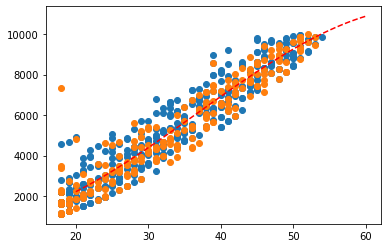

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Le decimos a jupyter que grafique en  el cuaderno
%matplotlib inline
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(20,60).reshape(-1, 1)
# Con el modelo predecimos X_plot
X_plot_poly = poly.fit_transform(X_plot)
y_plot = reg.predict(X_plot_poly)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

In [10]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.922008782407024
Prueba 0.9080727053101756


## SVR

RBF Entrenamiento 0.9202020639466746
RBF Prueba 0.9065874212188278
----
Linear Entrenamiento 0.920013131003473
Linear Prueba 0.9043560190495173
----
Poly Entrenamiento 0.9210476345389949
Poly Prueba 0.9070162459513766
----


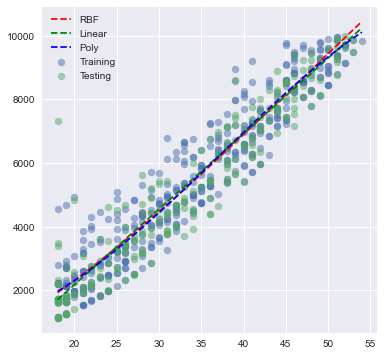

In [11]:
# Preparamos datos
X = df["age"].values.reshape(-1, 1)
y = df["charges"].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)


from sklearn.svm import SVR
plt.style.use("seaborn")
plt.figure(figsize=(6,6))


svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_scaler.inverse_transform(X_train), y_scaler.inverse_transform(y_train.reshape(-1,1)),label="Training",alpha=0.5)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_scaler.inverse_transform(X_test), y_scaler.inverse_transform(y_test.reshape(-1,1)),label="Testing",alpha=0.5)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_scaler.inverse_transform(X_plot), y_scaler.inverse_transform(y_plot.reshape(-1,1)), s,label=name)
    # Calculamos el error
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))
    print("----")

plt.legend();

## Arboles de Regresion

In [12]:
# Preparamos datos
X = df["age"].values.reshape(-1, 1)
y = df["charges"].values.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [14]:
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_5 = DecisionTreeRegressor(max_depth=6)

# Creando el modelo y entrenando
reg = tree_5.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = tree_5.predict(X_train)
# Prediciendo valores de validación
y_test_hat = tree_5.predict(X_test)

Entrenamiento 0.9284048204627893
Prueba 0.9010429442038316


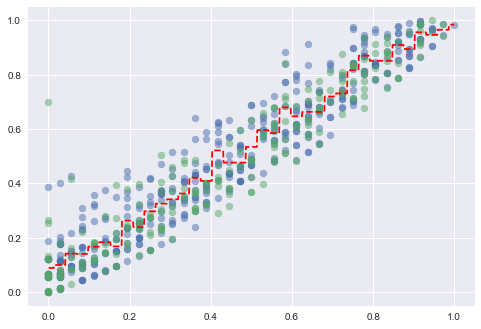

In [16]:
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train,alpha=0.5)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test,alpha=0.5)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,1,1000).reshape(-1, 1)
# Con el modelo predecimos X_plot
y_plot = tree_5.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Transformamos los datos

In [17]:
df["over5000"] = (df["charges"] > 5000).map({False: 0, True: 1})
df.corr()["charges"].sort_values()

Unnamed: 0    0.027502
bmi           0.060727
children      0.364465
over5000      0.866354
age           0.957013
charges       1.000000
Name: charges, dtype: float64

## Regresion logistica

In [18]:
df.head(100)

,Unnamed: 0,age,bmi,children,charges,over5000
0,1,18,33.77,1,1725.5523,0
1,2,28,33.00,3,4449.4620,0
2,4,32,28.88,0,3866.8552,0
3,5,31,25.74,0,3756.6216,0
4,6,46,33.44,1,8240.5896,1
...,...,...,...,...,...,...
95,184,44,30.69,2,7731.4271,1
96,186,26,29.92,2,3981.9768,0
97,187,30,30.90,3,5325.6510,1
98,188,41,32.20,1,6775.9610,1


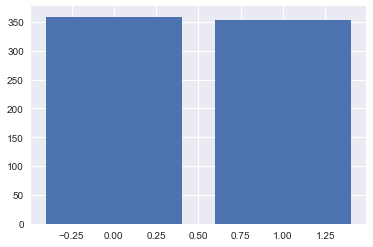

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df.over5000.unique(),df.over5000.value_counts());

In [24]:
df_no = df[df['over5000'] == 0]
df_yes = df[df['over5000'] == 1]

In [30]:
print("Con_0-->", df_no.shape)
print("Con_1-->",df_yes.shape)

Con_0--> (359, 6)
Con_1--> (353, 6)


In [31]:
X = df['age'].values.reshape(-1, 1)
y = df['over5000']
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=103)

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)
clf.score(X_train,y_train)

0.9287211740041929

In [33]:
clf.score(X_test,y_test)

0.9446808510638298

In [34]:
pro = clf.predict_proba(X_train)[:,0]

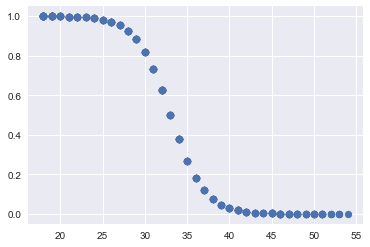

In [35]:
plt.scatter(X_train,pro)

In [36]:
from sklearn.metrics import confusion_matrix
labels = ['true','false']
confusion_matrix(y_train,y_train_hat)

array([[245,  12],
       [ 22, 198]], dtype=int64)

## Evaluamos

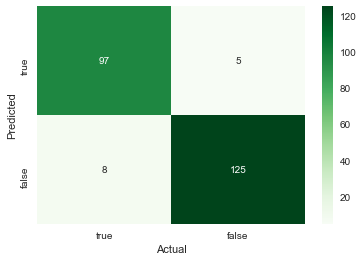

In [45]:
import seaborn as sns

cm = confusion_matrix(y_test,y_test_hat)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual');
import matplotlib.pyplot as plt

plt.savefig("figura.png")

In [38]:
TP,FP,FN,TN=cm.flatten()
print(TP,FP,FN,TN)

97 5 8 125


In [39]:
TPR = TP/(TP+FN)
TPR

0.9238095238095239

In [40]:
PPV = TP/(TP+FP)
PPV

0.9509803921568627

In [41]:
(TP+TN)/cm.sum()

0.9446808510638298

In [42]:
F = (2*TPR*PPV)/(TPR+PPV)
F

0.9371980676328502

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

0.9446808510638298
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       102
           1       0.96      0.94      0.95       133

    accuracy                           0.94       235
   macro avg       0.94      0.95      0.94       235
weighted avg       0.95      0.94      0.94       235

